In [35]:
import requests as rq
import pandas as pd
from pandas.io.json import json_normalize

apiKey = "cd2254b7d1d24127abb7a98a3b0ea10e"
HEADERS = {"X-API-Key": apiKey}
BUNGIE = "https://www.bungie.net/platform/Destiny/"
AccountType = "2"
mid = '4611686018428698313'

In [2]:
cid = '2305843009250714821'

In [30]:
def findRaids(mid, cid, count):
    url = BUNGIE + "Stats/ActivityHistory/" + AccountType + '/' + mid + '/' + cid + '/?mode=raid&count=' + str(count) +'/'
    r = rq.get(url, headers=HEADERS)
    activities = r.json()['Response']['data']['activities']
    

In [33]:
r3

<Response [200]>

In [34]:
r3.json()['Response']['data']['activities']

[{u'activityDetails': {u'activityTypeHashOverride': 2043403989,
   u'instanceId': u'6397589811',
   u'isPrivate': False,
   u'mode': 4,
   u'referenceId': 856898338},
  u'period': u'2017-05-02T14:08:20Z',
  u'values': {u'activityDurationSeconds': {u'basic': {u'displayValue': u'1h 9m',
     u'value': 4150.0},
    u'statId': u'activityDurationSeconds'},
   u'assists': {u'basic': {u'displayValue': u'86', u'value': 86.0},
    u'statId': u'assists'},
   u'completed': {u'basic': {u'displayValue': u'Yes', u'value': 1.0},
    u'statId': u'completed'},
   u'completionReason': {u'basic': {u'displayValue': u'0', u'value': 0.0},
    u'statId': u'completionReason'},
   u'deaths': {u'basic': {u'displayValue': u'20', u'value': 20.0},
    u'statId': u'deaths'},
   u'fireTeamId': {u'basic': {u'displayValue': u'', u'value': 0.0},
    u'statId': u'fireTeamId'},
   u'kills': {u'basic': {u'displayValue': u'174', u'value': 174.0},
    u'statId': u'kills'},
   u'killsDeathsAssists': {u'basic': {u'displayValu

In [36]:
myraids = json_normalize(r3.json()['Response']['data']['activities'])

In [37]:
myraids

,activityDetails.activityTypeHashOverride,activityDetails.instanceId,activityDetails.isPrivate,activityDetails.mode,activityDetails.referenceId,period,values.activityDurationSeconds.basic.displayValue,values.activityDurationSeconds.basic.value,values.activityDurationSeconds.statId,values.assists.basic.displayValue,...,values.killsDeathsAssists.statId,values.killsDeathsRatio.basic.displayValue,values.killsDeathsRatio.basic.value,values.killsDeathsRatio.statId,values.leaveRemainingSeconds.basic.displayValue,values.leaveRemainingSeconds.basic.value,values.leaveRemainingSeconds.statId,values.playerCount.basic.displayValue,values.playerCount.basic.value,values.playerCount.statId
0,2043403989,6397589811,False,4,856898338,2017-05-02T14:08:20Z,1h 9m,4150.0,activityDurationSeconds,86,...,killsDeathsAssists,8.70,8.700000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,6,6.0,playerCount
1,2043403989,6396779595,False,4,1387993552,2017-05-02T00:34:28Z,2h 51m,10261.0,activityDurationSeconds,165,...,killsDeathsAssists,16.34,16.343750,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,8,8.0,playerCount
2,2043403989,6327414056,False,4,856898338,2017-04-10T15:39:49Z,1h 1m,3676.0,activityDurationSeconds,31,...,killsDeathsAssists,2.71,2.705882,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,6,6.0,playerCount
3,2043403989,6327225968,False,4,856898338,2017-04-10T15:32:33Z,2m 0s,120.0,activityDurationSeconds,0,...,killsDeathsAssists,0.00,0.000000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,1,1.0,playerCount
4,2043403989,6327658596,False,4,856898338,2017-04-10T14:16:33Z,3h 45m,13530.0,activityDurationSeconds,18,...,killsDeathsAssists,2.46,2.461538,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,17,17.0,playerCount
5,2043403989,6304956884,False,4,856898338,2017-04-05T05:08:19Z,2h 59m,10770.0,activityDurationSeconds,27,...,killsDeathsAssists,4.20,4.200000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,9,9.0,playerCount
6,2043403989,6279442259,False,4,4000873610,2017-03-31T01:58:47Z,2h 34m,9265.0,activityDurationSeconds,235,...,killsDeathsAssists,10.17,10.171429,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,8,8.0,playerCount
7,2043403989,5784027461,False,4,1387993552,2016-10-22T07:06:11Z,1h 53m,6790.0,activityDurationSeconds,149,...,killsDeathsAssists,25.05,25.050000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,6,6.0,playerCount
8,2043403989,5783648218,False,4,1387993552,2016-10-22T04:41:16Z,2h 24m,8691.0,activityDurationSeconds,308,...,killsDeathsAssists,14.46,14.458333,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,8,8.0,playerCount
9,2043403989,5769111546,False,4,1387993552,2016-10-19T20:54:01Z,21m 0s,1260.0,activityDurationSeconds,6,...,killsDeathsAssists,30.50,30.500000,killsDeathsRatio,0m 0s,0.0,leaveRemainingSeconds,5,5.0,playerCount


In [38]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

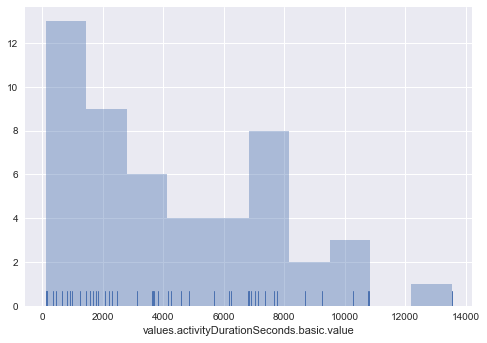

In [46]:
sns.distplot(myraids['values.activityDurationSeconds.basic.value'],bins = 10, kde=False, rug=True)

In [40]:
?sns.distplot

In [48]:
def getReport(instanceId):
    url = BUNGIE + '/Stats/PostGameCarnageReport/' + instanceId + '/'
    r = rq.get(url, headers=HEADERS, timeout = 10)
    return r.json()['Response']['data']

In [47]:
reports = []

In [49]:
for i in  myraids['activityDetails.instanceId']:
    print i
    reports.append(getReport(i))

6397589811
6396779595
6327414056
6327225968
6327658596
6304956884
6279442259
5784027461
5783648218
5769111546
5681304102
5660505411
5658908585
5627460179
5627174540
5615233561
5615165859
5615109432
5226675932
4906065936
4629995418
4618091917
4615943992
4598772130
4569932757
4569753508
4502415920
4493575606
4469666602
4469453165
4455955406
4430887965
4426979032
4355634714
4355213316
4352157148
4352058013
4319932550
4315128167
4282647006
4191315522
4187402264
4154774602
4154417137
4148279408
4108183573
4097816094
4089241843
4073691988
4073576536


In [51]:
len(reports)

50

In [53]:
import cPickle

In [55]:
cPickle.dump(reports, open("raidReports.p",'wb'))

In [56]:
ls

PvPGameReports.ipynb           enemys.json
PvPGameReports.md              raidReports.p
Raid network.ipynb             resources.md
activityReportSample-vog.json
